<a href="https://colab.research.google.com/github/wp225/sklearn/blob/main/sklearn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import numpy as np 

In [2]:
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
Y=iris.target

In [3]:
np.unique(Y)

array([0, 1, 2])

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=.77,random_state=1,stratify=Y)

In [5]:
print(np.bincount(Y))
print(np.bincount(Y_test))
print(np.bincount(Y_train))

[50 50 50]
[11 12 12]
[39 38 38]


In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [7]:
from sklearn.linear_model import Perceptron 
p=Perceptron(random_state=1,eta0=.003)
p.fit(X_train_std,Y_train)

Perceptron(eta0=0.003, random_state=1)

In [8]:
pred=p.predict(X_test_std)
print('wrong classification %d'%((Y_test != pred).sum()))

wrong classification 1


In [9]:
from sklearn.metrics import accuracy_score 
print('Accuracy: %.3f' % accuracy_score(Y_test,pred))

Accuracy: 0.971


In [24]:

   from matplotlib.colors import ListedColormap
   import matplotlib.pyplot as plt
   def plot_decision_regions(X, y, classifier, test_idx=None,
                             resolution=0.02):
       # setup marker generator and color map
       markers = ('s', 'x', 'o', '^', 'v')
       colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
       cmap = ListedColormap(colors[:len(np.unique(y))])
       # plot the decision surface
       x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
       x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
       xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                              np.arange(x2_min, x2_max, resolution))
       Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
       Z = Z.reshape(xx1.shape)
       plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
       plt.xlim(xx1.min(), xx1.max())
       plt.ylim(xx2.min(), xx2.max())
       for idx, cl in enumerate(np.unique(y)):
           plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                       alpha=0.8, c=colors[idx],
                       marker=markers[idx], label=cl,
                       edgecolor='black')
       if test_idx:
           # plot all examples
           X_test, y_test = X[test_idx, :], y[test_idx]
           plt.scatter(X_test[:, 0], X_test[:, 1],
                       
                        edgecolor='black', alpha=1.0,
                       linewidth=1, marker='o',
                       s=100, label='test set')

<ipython-input-24-d6eee7a1faaa>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


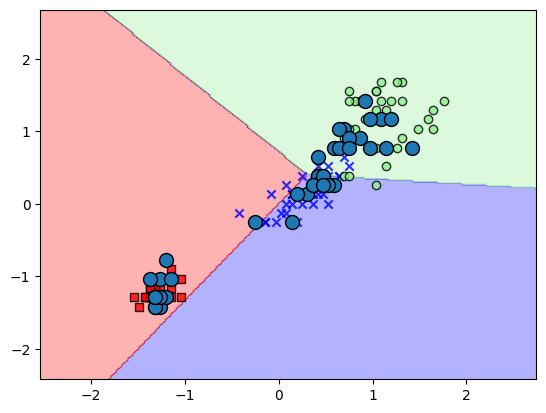

In [25]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=p,test_idx=range(105, 150))
plt.show()